In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading dataset...")
df = pd.read_csv("../data/final_cleaned_dataset.csv")

print(df.shape)
df.head()

Loading dataset...
(4145150, 25)


,lclid,tstp,energy,hour,day,month,weekday,date,is_weekend,visibility,...,windspeed,preciptype,icon,humidity,summary,is_holiday,stdortou,acorn,acorn_grouped,file
0,MAC000640,2012-12-13 08:00:00,0.065,8,13,12,3,2012-12-13,0,6.26,...,1.48,snow,partly-cloudy-night,0.90,Partly Cloudy,0,ToU,ACORN-E,Affluent,block_16
1,MAC000320,2012-10-19 10:00:00,0.133,10,19,10,4,2012-10-19,0,11.78,...,1.20,rain,partly-cloudy-day,0.93,Mostly Cloudy,0,Std,ACORN-E,Affluent,block_16
2,MAC000525,2012-12-08 23:00:00,0.174,23,8,12,5,2012-12-08,1,13.84,...,4.30,rain,partly-cloudy-night,0.85,Partly Cloudy,0,ToU,ACORN-E,Affluent,block_16
3,MAC000544,2013-07-17 21:00:00,0.177,21,17,7,2,2013-07-17,0,14.39,...,1.69,rain,clear-night,0.59,Clear,0,ToU,ACORN-E,Affluent,block_16
4,MAC002202,2013-08-10 12:00:00,0.076,12,10,8,5,2013-08-10,1,12.47,...,3.98,rain,partly-cloudy-day,0.48,Partly Cloudy,0,Std,ACORN-E,Affluent,block_16


In [14]:
print(df.info())
print(df.describe())

<class 'pandas.DataFrame'>
RangeIndex: 4145150 entries, 0 to 4145149
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   lclid                str    
 1   tstp                 str    
 2   energy               float64
 3   hour                 int64  
 4   day                  int64  
 5   month                int64  
 6   weekday              int64  
 7   date                 str    
 8   is_weekend           int64  
 9   visibility           float64
 10  windbearing          float64
 11  temperature          float64
 12  dewpoint             float64
 13  pressure             float64
 14  apparenttemperature  float64
 15  windspeed            float64
 16  preciptype           str    
 17  icon                 str    
 18  humidity             float64
 19  summary              str    
 20  is_holiday           int64  
 21  stdortou             str    
 22  acorn                str    
 23  acorn_grouped        str    
 24  file     

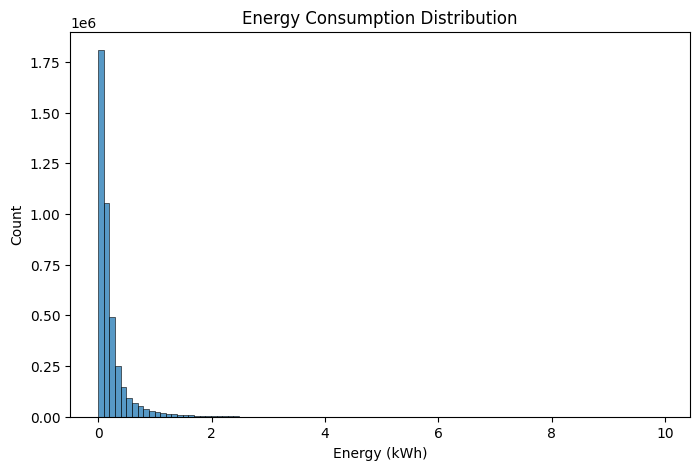

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['energy'], bins=100)
plt.title("Energy Consumption Distribution")
plt.xlabel("Energy (kWh)")
plt.show()

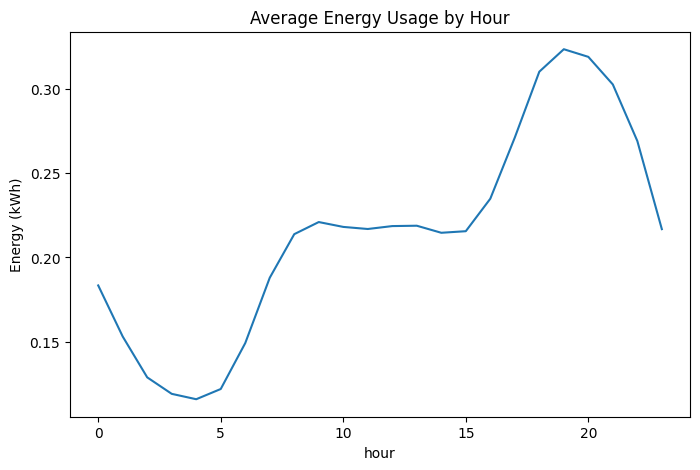

In [19]:
hourly = df.groupby('hour')['energy'].mean()

plt.figure(figsize=(8,5))
hourly.plot()
plt.title("Average Energy Usage by Hour")
plt.ylabel("Energy (kWh)")
plt.show()

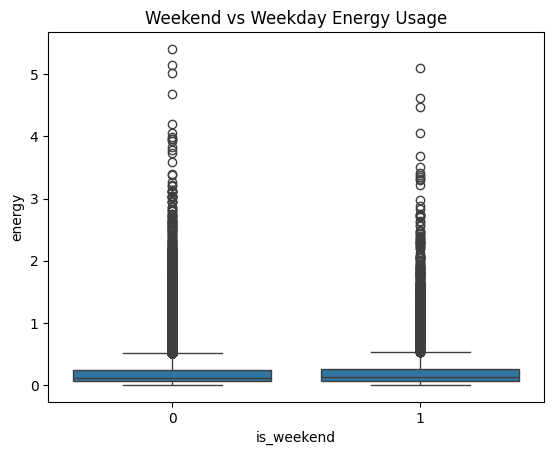

In [20]:
sns.boxplot(x='is_weekend', y='energy', data=df.sample(50000))
plt.title("Weekend vs Weekday Energy Usage")
plt.show()

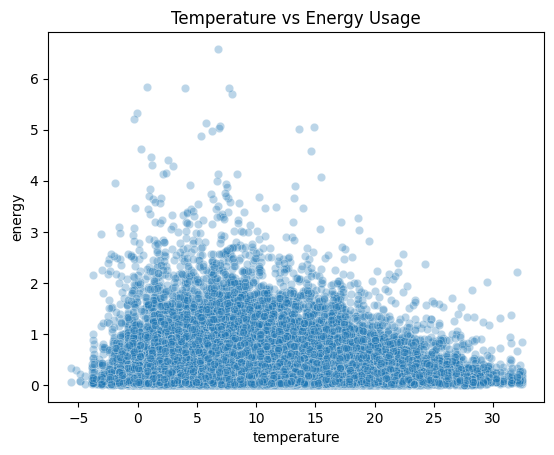

In [21]:
sample = df.sample(100000)

sns.scatterplot(x='temperature', y='energy', data=sample, alpha=0.3)
plt.title("Temperature vs Energy Usage")
plt.show()


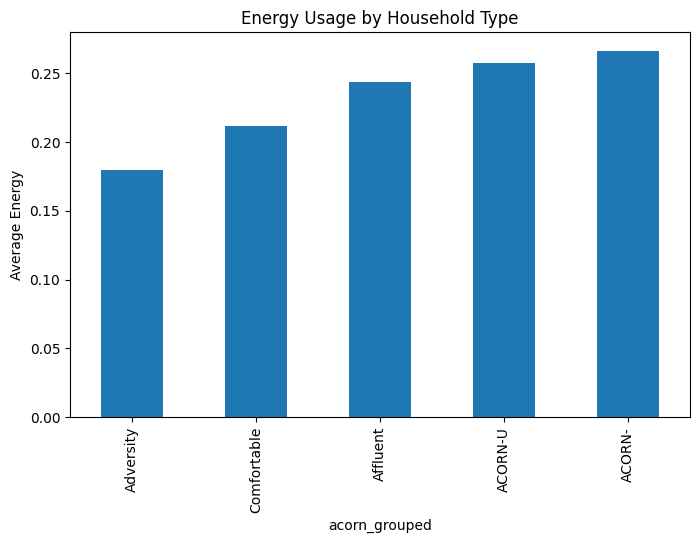

In [22]:
acorn_usage = df.groupby('acorn_grouped')['energy'].mean().sort_values()

acorn_usage.plot(kind='bar', figsize=(8,5))
plt.title("Energy Usage by Household Type")
plt.ylabel("Average Energy")
plt.show()

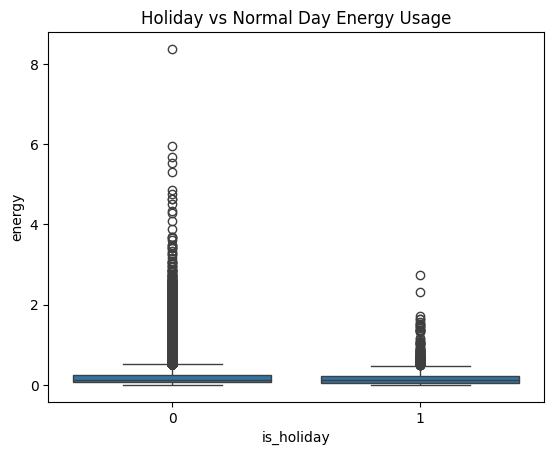

In [23]:
sns.boxplot(x='is_holiday', y='energy', data=df.sample(50000))
plt.title("Holiday vs Normal Day Energy Usage")
plt.show()


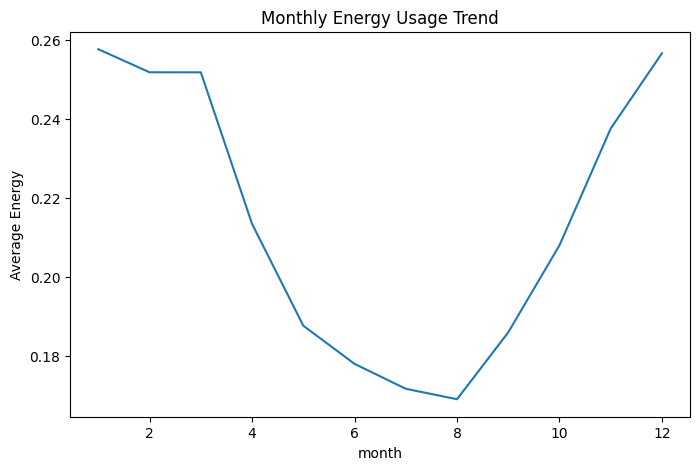

In [24]:
monthly = df.groupby('month')['energy'].mean()

monthly.plot(figsize=(8,5))
plt.title("Monthly Energy Usage Trend")
plt.ylabel("Average Energy")
plt.show()


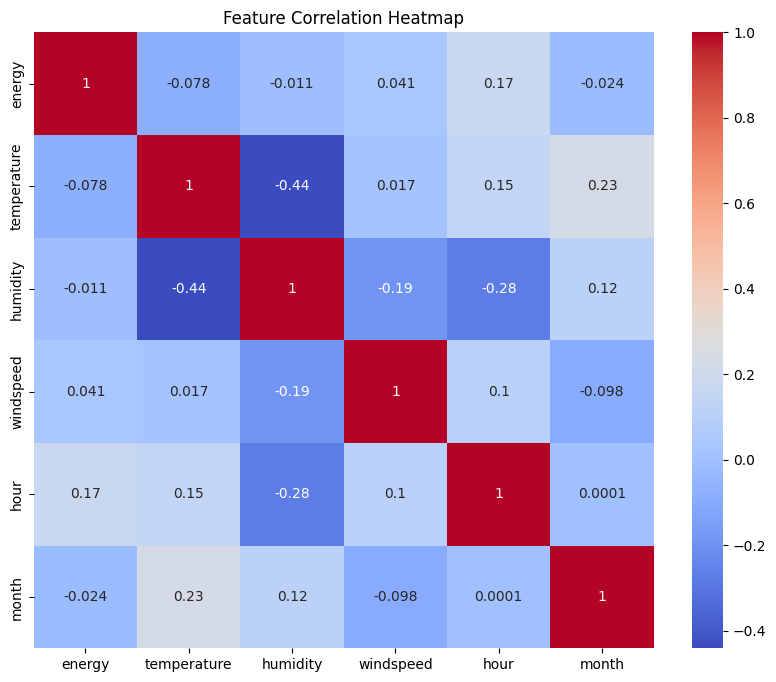

In [25]:
plt.figure(figsize=(10,8))
corr = df[['energy','temperature','humidity','windspeed','hour','month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
